# Importing Lib

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer



# Importing Data

In [341]:
df=pd.read_csv('./data/Amazon-Product-Reviews - Amazon Product Review.csv')
# List all the columns
columns = df.columns.tolist()
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,text
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,0,1,Five Stars,Great love it,2015-08-31,1,Five Stars Great love it
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,0,0,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0,Lots of ads Slow processing speed Occasionally...
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,0,1,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1,Well thought out device Excellent unit. The v...
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,0,0,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1,Not all apps/games we were looking forward to ...
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,0,1,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1,Five Stars All Amazon products continue to mee...


## Display basic information about the dataset

In [342]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  int64 
 11  verified_purchase  30846 non-null  int64 
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
 16  text               30840 non-null  objec

In [343]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,vine,verified_purchase,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.0,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,3.424237,0.68641,0.895027,0.0,0.870388,0.835343
std,1.611172e+07,0.0,1.436441,30.74337,32.356354,0.0,0.335881,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000
25%,1.150637e+07,2693241.0,2.000000,0.00000,0.000000,0.0,1.000000,1.000000
50%,2.294025e+07,2693241.0,4.000000,0.00000,0.000000,0.0,1.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,0.0,1.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,0.0,1.000000,1.000000


# Data Checking & Cleaning

In [344]:
def list_missing_values(df):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df)
    
    # Create a dictionary to store the count and percentage of missing values for each column
    missing_values_summary = {
        'Column': [],
        'Missing Values Count': [],
        'Missing Values Percentage': []
    }
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the number of missing values in the column
        missing_count = df[col].isnull().sum()
        
        if missing_count > 0:
            # Calculate the percentage of missing values in the column
            missing_percentage = (missing_count / total_rows) * 100
            
            # Append the column name, missing count, and missing percentage to the summary dictionary
            missing_values_summary['Column'].append(col)
            missing_values_summary['Missing Values Count'].append(missing_count)
            missing_values_summary['Missing Values Percentage'].append(missing_percentage)
    
    # Convert the summary dictionary to a DataFrame for a tabular view
    missing_values_df = pd.DataFrame(missing_values_summary)
    
    return missing_values_df
def list_occurrences(df, include_columns=None):
    if include_columns is None:
        include_columns = []

    # Create an empty list to store the occurrence summary for each column
    occurrences_summary = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        if col not in include_columns:
            continue
        
        # Calculate the total number of non-null values in the column
        total_non_null = df[col].notnull().sum()
        
        # Calculate the count and percentage of each unique occurrence in the column
        occurrence_counts = df[col].value_counts(dropna=False)
        occurrence_percentages = (occurrence_counts / total_non_null) * 100

        # Create a DataFrame for the current column's occurrences
        column_summary = pd.DataFrame({
            'Column': col,
            'Value': occurrence_counts.index,
            'Count': occurrence_counts.values,
            'Percentage': occurrence_percentages.values
        })
        
        # Append the current column's summary to the overall summary list
        occurrences_summary.append(column_summary)
    
    # Concatenate all column summaries into a single DataFrame
    occurrences_summary_df = pd.concat(occurrences_summary, ignore_index=True)
    
    return occurrences_summary_df


## Missing

In [345]:
# Missing attributes
list_missing_values(df)

,Column,Missing Values Count,Missing Values Percentage
0,review_headline,2,0.006484
1,review_body,4,0.012968
2,text,6,0.019451


## Ferquencey and their percentage

In [346]:
# Ferquencey and their percentage
list_occurrences(df,include_columns=['sentiment'])

,Column,Value,Count,Percentage
0,sentiment,1,25767,83.534332
1,sentiment,0,5079,16.465668


# Data Perparation

## Preprocessing

In [347]:
# Preprocessing
df['verified_purchase'] = df['verified_purchase'].apply(lambda x: 1 if x == "Y" else 0)
df['vine'] = df['vine'].apply(lambda x: 1 if x == "Y" else 0)

# Combine text fields
df['text'] = df['review_headline'] + " " + df['review_body']
df['text'] = df['text'].fillna('')

## Correlation Analysis

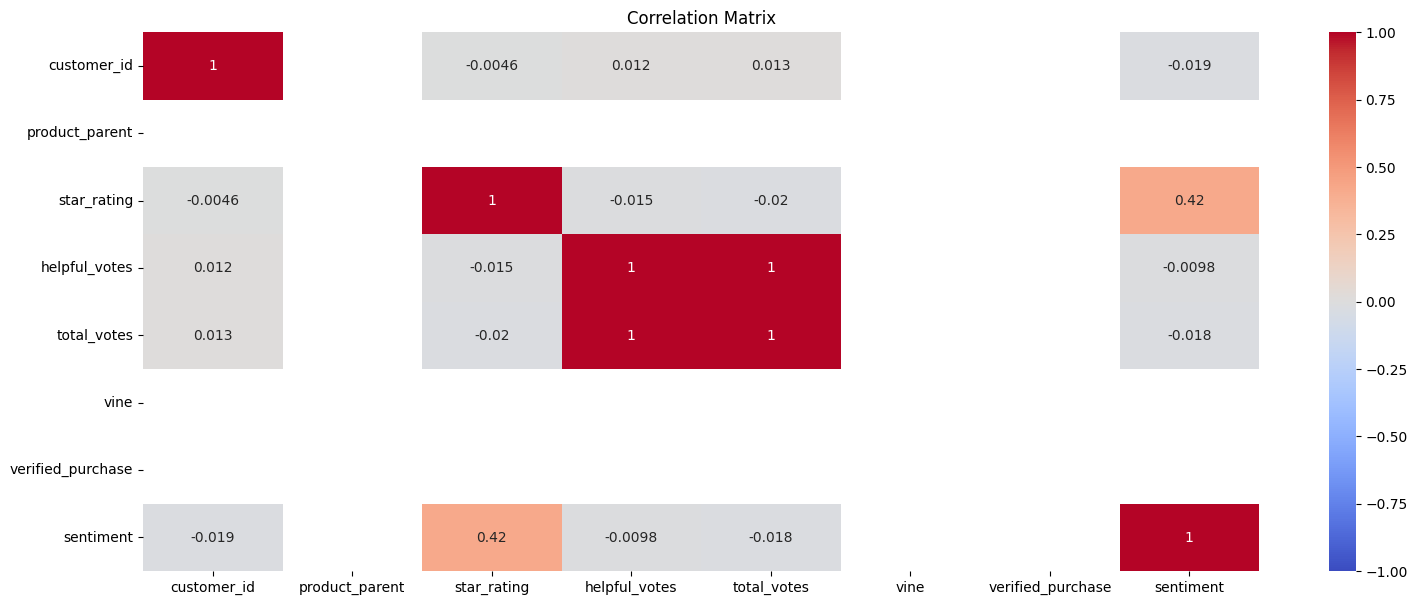

In [348]:
# Ensure all columns are numeric
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### features that are highly correlated with the target variable

In [349]:
# Select features that are highly correlated with the target variable for numeric variable
target_variable = 'sentiment' 
correlation_with_target = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)
print(correlation_with_target)

star_rating          0.420370
helpful_votes       -0.009823
total_votes         -0.018136
customer_id         -0.018717
product_parent            NaN
vine                      NaN
verified_purchase         NaN
Name: sentiment, dtype: float64


## Text Feature extraction


In [350]:
# Feature extraction
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df['text'])


## Dimensionality Reduction and Visualization


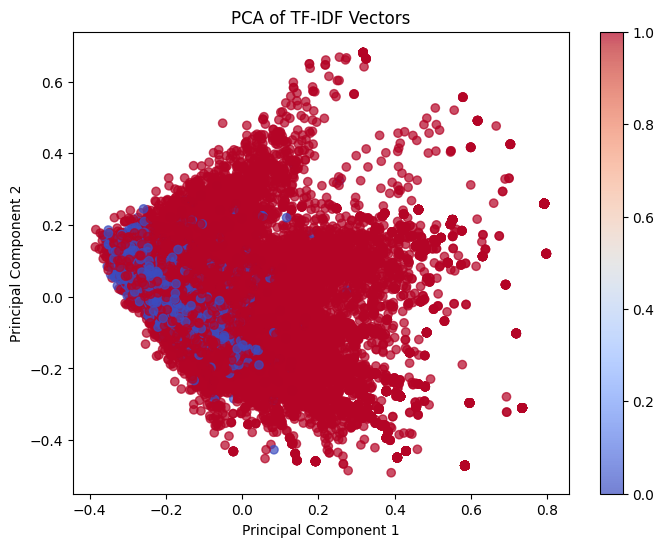

In [351]:

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_text.toarray())

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar()
plt.title('PCA of TF-IDF Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [352]:
# # Apply t-SNE for dimensionality reduction to 2D
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_text.toarray())

# # Plot t-SNE result
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['sentiment'], cmap='coolwarm', alpha=0.7)
# plt.colorbar()
# plt.title('t-SNE of TF-IDF Vectors')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()

# Analysis

## Feature Selection

In [353]:
# Combine with numeric features
X_numeric = df[['star_rating', 'helpful_votes','total_votes']]
X = pd.concat([pd.DataFrame(X_text.toarray()), X_numeric.reset_index(drop=True)], axis=1)
y = df['sentiment']

In [354]:
# Convert column names to strings
X.columns = X.columns.astype(str)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classification Model

In [355]:
# Logistic Regression model
model = LogisticRegression(max_iter=30000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [356]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation

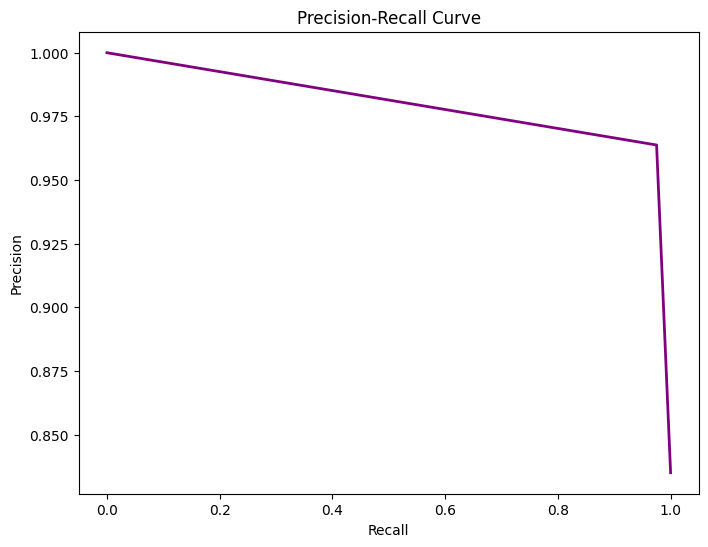

In [357]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


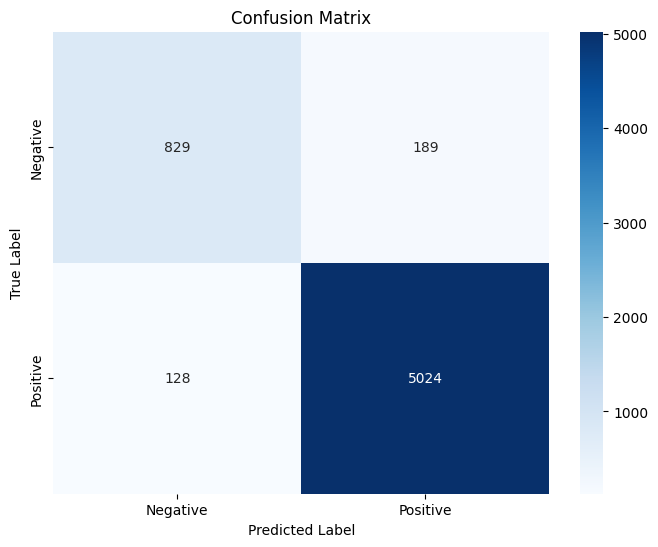

In [358]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


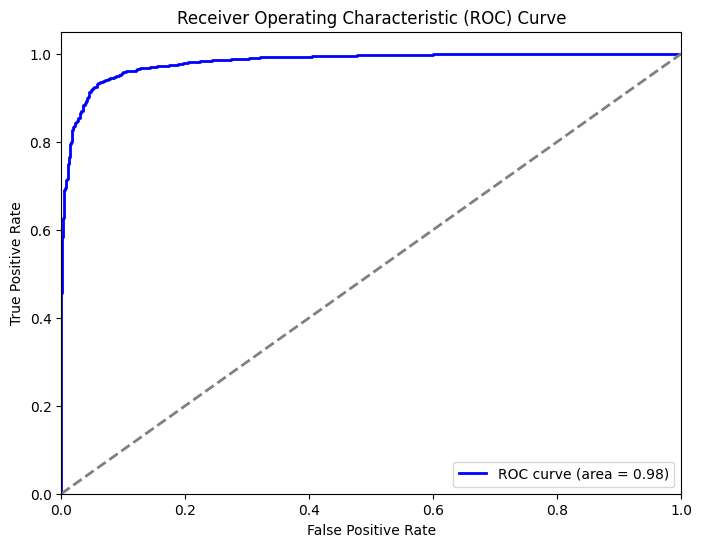

In [359]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [360]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9486223662884927
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1018
           1       0.96      0.98      0.97      5152

    accuracy                           0.95      6170
   macro avg       0.91      0.89      0.90      6170
weighted avg       0.95      0.95      0.95      6170

